# Interpolación de trazadores cúbico

Examen: comparar el trazador cubico hecho con la función interp1d de python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pylab
import scipy.misc as sci
from scipy.interpolate import interp1d

In [372]:
def traz_cub(x_i,y_i):

    n = len(x_i)
    a = y_i
    h = np.zeros(n-1, dtype = float)
    alfa = np.zeros(n-1, dtype = float)
    for i in range(n-1):
        h[i] = (x_i[i+1]-x_i[i])
        if i > 0:
            alfa[i] =((3/h[i])*(a[i+1]-a[i]))-((3/h[i-1])*(a[i]-a[i-1]))

    l = np.zeros(n,dtype = float)
    mu = np.zeros(n,dtype = float)
    z = np.zeros(n,dtype = float)
    l[0] = 1
    mu[0] = 0
    z[0] = 0
    
    c = np.zeros(n,dtype = float)
    b = np.zeros(n-1,dtype = float)
    d = np.zeros(n-1,dtype = float)
    for i in range(n-1):
        if i > 0:
            l[i] = ((2*(x_i[i+1]-x_i[i-1]))-(h[i-1]*mu[i-1]))
            mu[i] = h[i]/l[i]
            z[i] = (alfa[i]-(h[i-1]*z[i-1]))/l[i]
    
    l[n-1] = 1
    z[n-1] = 0
    c[n-1] = 0
    for i in range(n-1):
        j = n-2-i
        c[j] = z[j]-(mu[j]*c[j+1])
        b[j] = ((a[j+1] - a[j])/h[j]) - ((h[j]*(c[j+1]-2*c[j]))/(3))
        d[j] = (c[j+1]-c[j])/(3*h[j])
    s = []
    x = []
    for i in range(n-1):
        x.append(np.linspace(x_i[i],x_i[i+1],5000))
        s.append(a[i] + b[i]*(x[i]-x_i[i]) + c[i]*(x[i]-x_i[i])**2 + d[i]*(x[i]-x_i[i])**3)
    
    return (x,s)


In [373]:
data = np.loadtxt('psi_star.dat').T

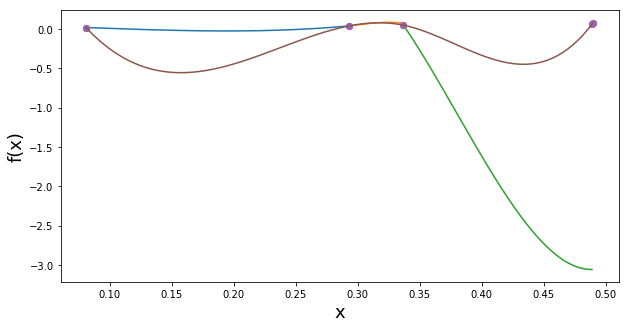

In [377]:
x_i = data[0][0:5]
y_i = data[1][0:5]

#·x_i = [0,0.75,1.5]
#y_i = [0,-0.0409838,1.31799]

x,P = traz_cub(x_i,y_i)

f2 = interp1d(x_i, y_i, kind='cubic')
xnew = np.linspace(np.min(x_i),np.max(x_i), num=100, endpoint=True)

plt.figure(figsize=(10,5))
plt.plot(x_i,y_i,'ro')
for i in range(len(x)):
    plt.plot(x[i],P[i])
plt.plot(x_i, y_i, 'o', xnew, f2(xnew), '-')
plt.xlabel("x",fontsize=18)
plt.ylabel("f(x)",fontsize=18)
plt.show()


In [378]:
def traza3natural(xi,yi):
    n = len(xi)
    
    # Valores h
    h = np.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        h[j] = xi[j+1] - xi[j]
    
    # Sistema de ecuaciones
    A = np.zeros(shape=(n-2,n-2), dtype = float)
    B = np.zeros(n-2, dtype = float)
    S = np.zeros(n, dtype = float)
    A[0,0] = 2*(h[0]+h[1])
    A[0,1] = h[1]
    B[0] = 6*((yi[2]-yi[1])/h[1] - (yi[1]-yi[0])/h[0])
    for i in range(1,n-3,1):
        A[i,i-1] = h[i]
        A[i,i] = 2*(h[i]+h[i+1])
        A[i,i+1] = h[i+1]
        B[i] = 6*((yi[i+2]-yi[i+1])/h[i+1] - (yi[i+1]-yi[i])/h[i])
    A[n-3,n-4] = h[n-3]
    A[n-3,n-3] = 2*(h[n-3]+h[n-2])
    B[n-3] = 6*((yi[n-1]-yi[n-2])/h[n-2] - (yi[n-2]-yi[n-3])/h[n-3])
    
    # Resolver sistema de ecuaciones
    r = np.linalg.solve(A,B)
    # S
    for j in range(1,n-1,1):
        S[j] = r[j-1]
    S[0] = 0
    S[n-1] = 0
    
    # Coeficientes
    a = np.zeros(n-1, dtype = float)
    b = np.zeros(n-1, dtype = float)
    c = np.zeros(n-1, dtype = float)
    d = np.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        a[j] = (S[j+1]-S[j])/(6*h[j])
        b[j] = S[j]/2
        c[j] = (yi[j+1]-yi[j])/h[j] - (2*h[j]*S[j]+h[j]*S[j+1])/6
        d[j] = yi[j]
        
    
    s = []
    x = []
    for i in range(n-1):
        x.append(np.linspace(x_i[i],x_i[i+1],5000))
        s.append(d[i] + c[i]*(x[i]-x_i[i]) + b[i]*(x[i]-x_i[i])**2 + a[i]*(x[i]-x_i[i])**3)
    return (x,s)

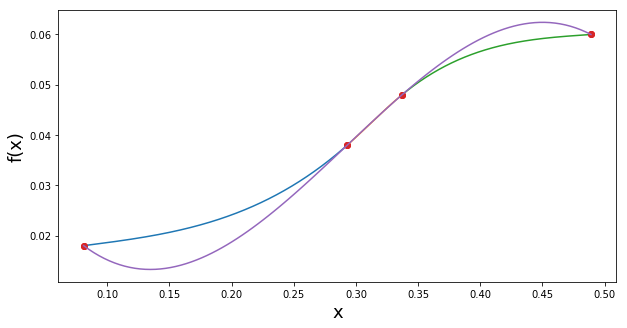

In [380]:
x_i = data[0][0:4]
y_i = data[1][0:4]


x,P = traza3natural(x_i,y_i)

f2 = interp1d(x_i, y_i, kind='cubic')
xnew = np.linspace(np.min(x_i),np.max(x_i), num=100, endpoint=True)

plt.figure(figsize=(10,5))
plt.plot(x_i,y_i,'ro')
for i in range(len(x)):
    plt.plot(x[i],P[i])
plt.plot(x_i, y_i, 'o', xnew, f2(xnew), '-')
plt.xlabel("x",fontsize=18)
plt.ylabel("f(x)",fontsize=18)
plt.show()
